# Solar Power Prediction
Antonio Lang
CS 458

In [243]:
import IPython

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

train_data = pd.read_csv("solar_training.csv")
test_data = pd.read_csv("solar_test.csv")

# Data Exploration

In [244]:
train_data.head()

,ZONEID,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,1,20120401 01:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,1,20120401 02:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,1,20120401 03:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,1,20120401 04:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,1,20120401 05:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987


In [245]:
test_data.head()

,ZONEID,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,1.0,20130701 01:00,0.001335,0.0,95342.6875,74.118164,0.048920,1.131939,-0.579174,282.172363,1557786.0,955170.625,1733948.0,0.0,0.123846
1,1.0,20130701 02:00,0.000179,0.0,95259.6875,67.015564,0.005646,1.716605,-0.476846,284.574219,3380267.0,1906639.000,3728032.0,0.0,0.194103
2,1.0,20130701 03:00,0.000267,0.0,95166.3125,59.357101,0.000000,2.750459,-0.378750,286.135742,5244430.0,2872777.000,5764803.0,0.0,0.511474
3,1.0,20130701 04:00,0.000572,0.0,95111.5000,54.863464,0.000000,3.973446,0.103195,286.377685,6910629.0,3845137.000,7611417.0,0.0,0.525128
4,1.0,20130701 05:00,0.000755,0.0,95100.5000,55.692444,0.000977,4.154067,0.386442,285.615723,8172020.0,4816626.000,9055756.0,0.0,0.348846


In [246]:
training_data_1 = train_data[train_data['ZONEID'] == 1]
test_data_1 = test_data[test_data['ZONEID'] == 1]
training_data_1.pop('ZONEID')
test_data_1.pop('ZONEID')
train_time_1 = pd.DataFrame(pd.to_datetime(training_data_1.pop('TIMESTAMP'), format='%Y%m%d %H:%M'))
test_time_1 = pd.DataFrame(pd.to_datetime(test_data_1.pop('TIMESTAMP'), format='%Y%m%d %H:%M'))

training_data_2 = train_data[train_data['ZONEID'] == 2]
test_data_2 = test_data[test_data['ZONEID'] == 2]
training_data_2.pop('ZONEID')
test_data_2.pop('ZONEID')
train_time_2 = pd.DataFrame(pd.to_datetime(training_data_2.pop('TIMESTAMP'), format='%Y%m%d %H:%M'))
test_time_2 = pd.DataFrame(pd.to_datetime(test_data_2.pop('TIMESTAMP'), format='%Y%m%d %H:%M'))

training_data_3 = train_data[train_data['ZONEID'] == 3]
test_data_3 = test_data[test_data['ZONEID'] == 3]
training_data_3.pop('ZONEID')
test_data_3.pop('ZONEID')
train_time_3 = pd.DataFrame(pd.to_datetime(training_data_3.pop('TIMESTAMP'), format='%Y%m%d %H:%M'))
test_time_3 = pd.DataFrame(pd.to_datetime(test_data_3.pop('TIMESTAMP'), format='%Y%m%d %H:%M'))

train_data = [training_data_1, training_data_2, training_data_3]
test_data = [test_data_1, test_data_2, test_data_3]
train_time = [train_time_1, train_time_2, train_time_3]
test_time = [test_time_1, test_time_2, test_time_3]

del training_data_1, training_data_2, training_data_3
del test_data_1, test_data_2, test_data_3
del train_time_1, train_time_2, train_time_3
del test_time_1, test_time_2, test_time_3

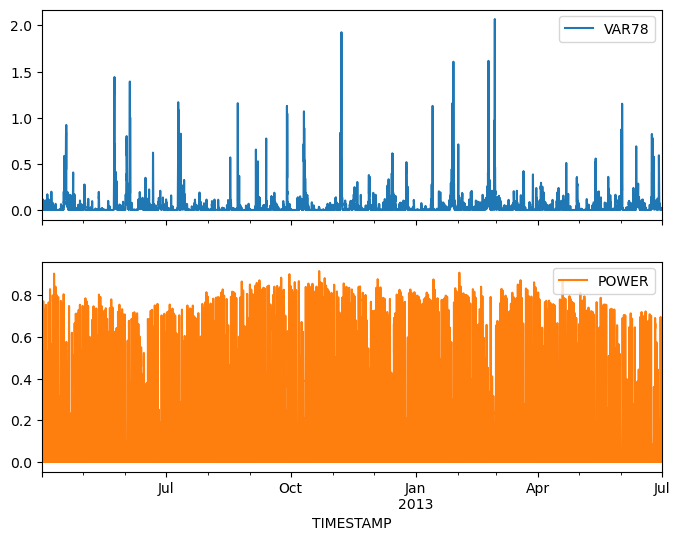

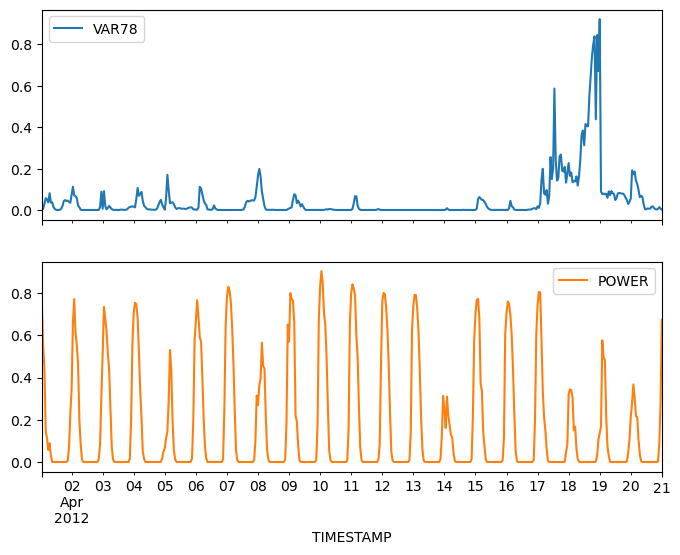

In [247]:
plot_cols = ['VAR78', 'POWER']
plot_features = train_data[0][plot_cols]
plot_features.index = train_time[0]['TIMESTAMP']
_ = plot_features.plot(subplots=True)

plot_features = train_data[0][plot_cols][:480]
plot_features.index = train_time[0]['TIMESTAMP'][:480]
_ = plot_features.plot(subplots=True)

In [248]:
train_data[0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VAR78,10944.0,3.889433e-02,1.138095e-01,0.000000,0.000000e+00,2.349854e-03,3.238106e-02,2.068974e+00
VAR79,10944.0,1.565516e-02,4.971535e-02,0.000000,0.000000e+00,8.130000e-05,5.745411e-03,6.066458e-01
VAR134,10944.0,9.477877e+04,5.725483e+02,92587.812500,9.439694e+04,9.476612e+04,9.518114e+04,9.630806e+04
VAR157,10944.0,6.906619e+01,1.948787e+01,10.228189,5.465900e+01,7.208055e+01,8.583268e+01,1.017909e+02
VAR164,10944.0,4.159219e-01,3.981049e-01,0.000000,7.354736e-03,2.982025e-01,8.552530e-01,1.000007e+00
VAR165,10944.0,7.318901e-01,2.726314e+00,-8.908603,-1.071350e+00,5.216699e-01,2.350360e+00,1.305672e+01
VAR166,10944.0,-1.831618e-01,1.922577e+00,-7.636124,-1.451407e+00,-3.780746e-01,9.789636e-01,8.979910e+00
VAR167,10944.0,2.851357e+02,7.177476e+00,270.266357,2.797714e+02,2.842356e+02,2.898708e+02,3.100623e+02
VAR169,10944.0,1.189265e+07,6.451321e+06,187820.375000,7.201339e+06,1.058380e+07,1.652278e+07,3.410930e+07
VAR175,10944.0,1.381978e+07,7.719015e+06,865972.812500,7.316644e+06,1.372081e+07,1.994981e+07,3.417538e+07


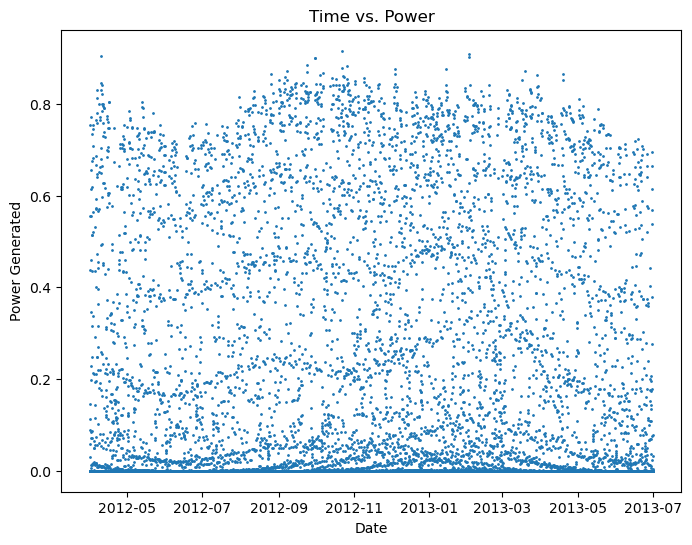

In [249]:
plt.title("Time vs. Power")
plt.xlabel("Date")
plt.ylabel("Power Generated")
plt.scatter(train_time[0], train_data[0]['POWER'], s=1)

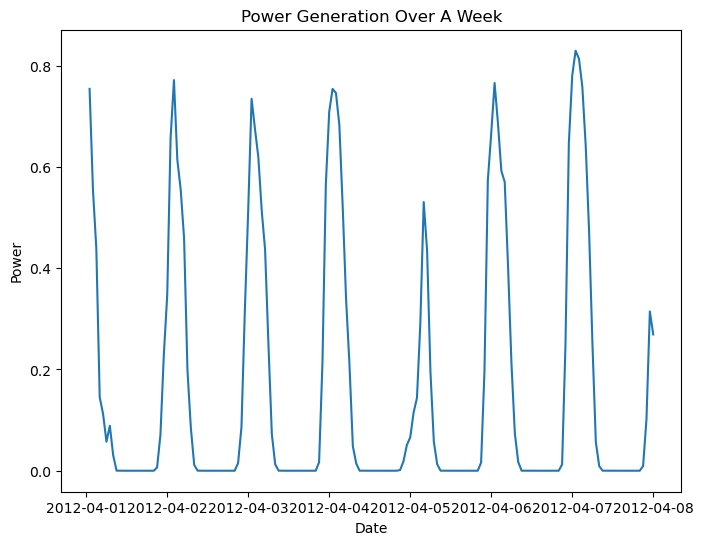

In [250]:
hours_in_week = 7 * 24
plt.title("Power Generation Over A Week")
plt.xlabel('Date')
plt.ylabel('Power')
plt.plot(train_time[0][:hours_in_week], train_data[0][:hours_in_week]['POWER'])

The graph above highlights the cyclical nature of power generation over the course of a week.

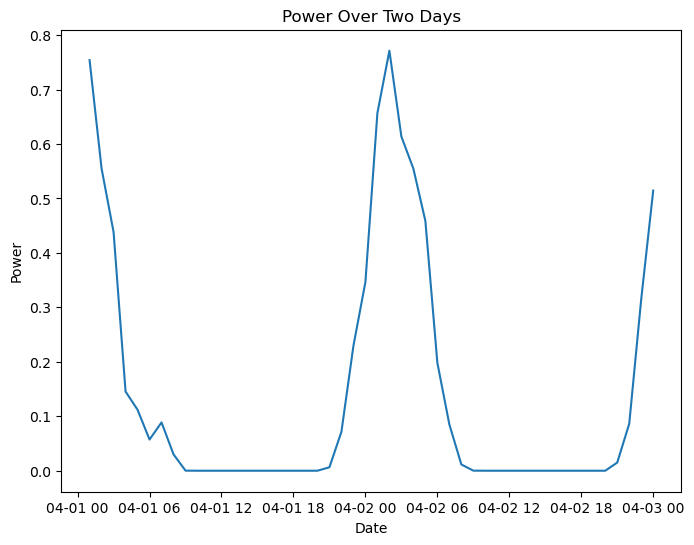

In [251]:
data_range = 2 * 24
plt.title("Power Over Two Days")
plt.xlabel('Date')
plt.ylabel('Power')
plt.plot(train_time[0][:data_range], train_data[0][:data_range]['POWER'])

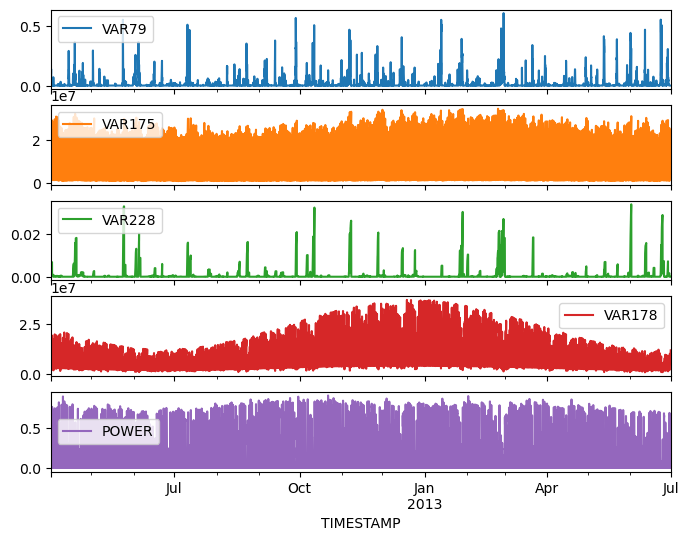

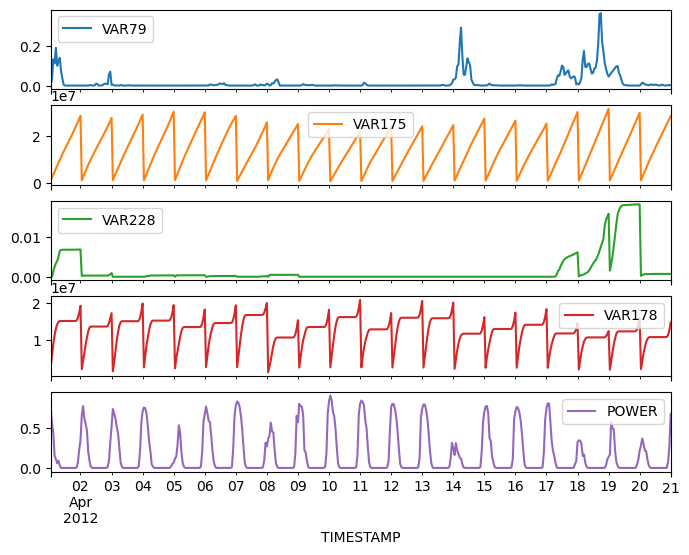

In [252]:
plot_cols = ['VAR79', 'VAR175', 'VAR228', 'VAR178', 'POWER']
plot_features = train_data[0][plot_cols]
plot_features.index = train_time[0]['TIMESTAMP']
_ = plot_features.plot(subplots=True)

plot_features = train_data[0][plot_cols][:480]
plot_features.index = train_time[0]['TIMESTAMP'][:480]
_ = plot_features.plot(subplots=True)

In [253]:
# Converting accumulative values to marginal change

# VARs 169, 175, 178, 228 are accumulative
var_list = ['VAR169', 'VAR175', 'VAR178', 'VAR228']
m_var_names = ["m" + var_name for var_name in var_list]
for i in range(len(train_data)):
    accum_sets = [train_data[i][var_list], test_data[i][var_list]]
    marginal_sets = [pd.DataFrame().reindex_like(accum_sets[0]), pd.DataFrame().reindex_like(accum_sets[1])]

    for j in range (0,2): # calcs over training then test set

        for variable in var_list:
            marginal_sets[j][variable] = accum_sets[j][variable].diff()
        marginal_sets[j].columns = m_var_names
        marginal_sets[j][m_var_names] = marginal_sets[j][m_var_names].fillna(0)

        if j == 0:
            train_data[i] = pd.concat([train_data[i], marginal_sets[j]], axis=1)
        elif j == 1:
            test_data[i] = pd.concat([test_data[i], marginal_sets[j]], axis=1)

In [254]:
correlations = []

for dataset in train_data:
    correlations.append(pd.DataFrame(dataset.corr()['POWER']))

<AxesSubplot:>

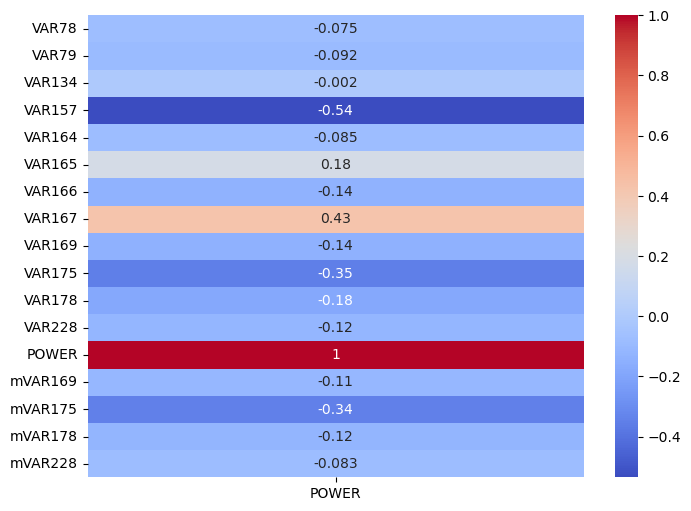

In [255]:
sns.heatmap(correlations[0], cmap="coolwarm", annot=True)

<AxesSubplot:>

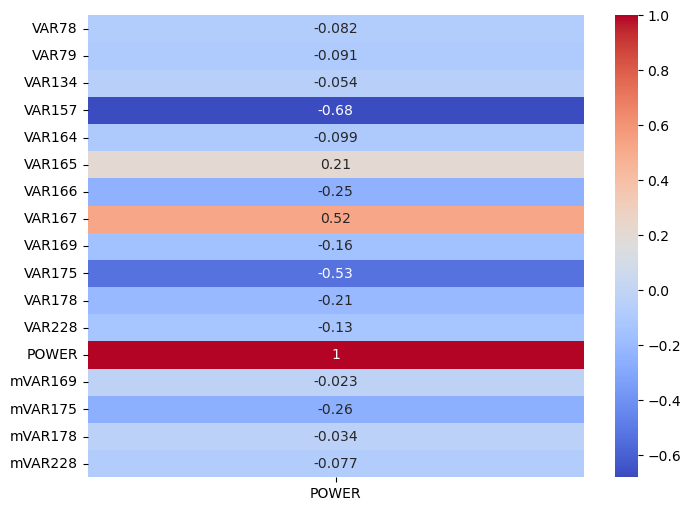

In [256]:
sns.heatmap(correlations[1], cmap="coolwarm", annot=True)

<AxesSubplot:>

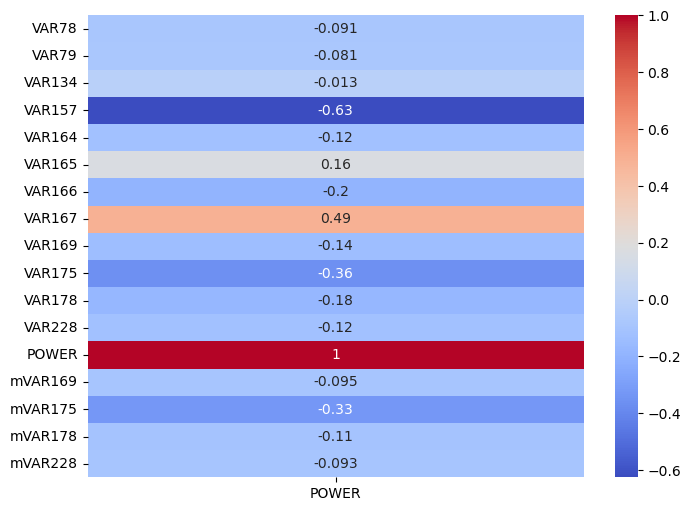

In [257]:
sns.heatmap(correlations[2], cmap="coolwarm", annot=True)

# Feature Engineering
For the sake of visualization, only zone 1 is shown.

In [258]:
# Split training data into training and validation sets

train_dfs = []
val_dfs = []
test_dfs = []
num_features = []

for dataset in train_data:
    column_indices = {name: i for i, name in enumerate(dataset.columns)}
    n = len(dataset)
    train_dfs.append(dataset[0:int(n*0.7)])
    val_dfs.append(dataset[int(n*0.7):])
    num_features.append(dataset.shape[1])

In [260]:
# Separate Datetime information to month, season, and hour

month_to_season = [month%12 // 3 + 1 for month in range(1, 13)]
month_to_season = dict(zip(range(1,13), month_to_season))

for i in range(0, len(train_time)):
    train_test_data = [train_time[i], test_time[i]]
    for dataset in train_test_data:
        dataset['MONTH'] = dataset['TIMESTAMP'].dt.month
        dataset['SEASON'] = dataset['TIMESTAMP'].dt.month.map(month_to_season)
        dataset['HOUR'] = dataset['TIMESTAMP'].dt.hour

In [261]:
# Normalize Data

from sklearn.preprocessing import MinMaxScaler

# using min-max normalization
# for i in range(0,len(train_dfs)):
#     train_copy = train_dfs[i].copy()
#     val_copy = val_dfs[i].copy()
#     test_copy = test_dfs[i].copy()
#     train_power = train_copy.pop("POWER")
#     val_power = val_copy.pop("POWER")
#     test_power = test_copy.pop("POWER")
    
#     scaler = MinMaxScaler().fit(train_copy)
#     train_dfs[i] = pd.concat([pd.DataFrame(scaler.transform(train_copy), columns=train_copy.columns), train_power], axis=1)
#     val_dfs[i] = pd.concat([pd.DataFrame(scaler.transform(val_copy), columns=val_copy.columns), val_power], axis=1)
#     test_dfs[i] = pd.concat([pd.DataFrame(scaler.transform(test_copy)), test_power], axis=1, ignore_index=True)
#     test_dfs[i].columns=test_copy.columns # doesn't have 'POWER' name


# using standard normalization
for i in range(0,len(train_dfs)):
    train_mean = train_dfs[i].mean()
    train_std = train_dfs[i].std()

    train_mean['POWER'] = 0
    train_std['POWER'] = 1

    
    train_dfs[i] = (train_dfs[i] - train_mean) / train_std
    val_dfs[i] = (val_dfs[i] - train_mean) / train_std
    test_data[i] = (test_data[i] - train_mean) / train_std

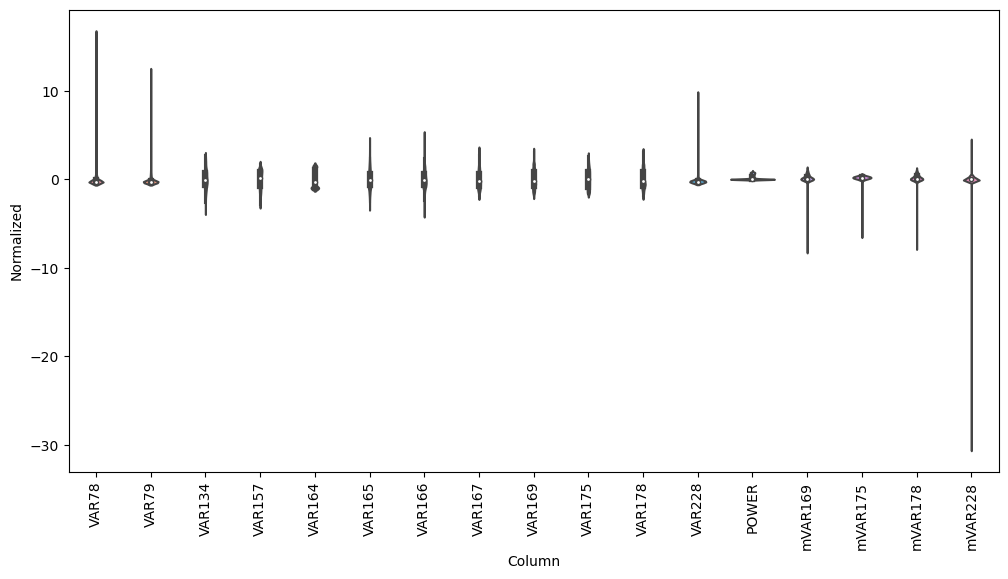

In [262]:
# df_std = (train_data[0] - train_mean) / train_std
df_std = train_dfs[0].copy()
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(train_data[0].keys(), rotation=90)

# Windowing the Data

In [263]:
class Window():
    def __init__():
        pass

# Models

## Naive Model

This model predicts the power generation will be the same as the previous day's

In [317]:
sv_predictions = []
for i in range(0,3):
    sv_prediction = test_data[i]['POWER'].copy()
    sv_prediction = sv_prediction.head(sv_prediction.shape[0]-24)
    sv_prediction = pd.concat([train_data[i]['POWER'].head(24), sv_prediction], ignore_index=True)
    sv_prediction[sv_prediction<0] = 0
    sv_predictions.append(sv_prediction)

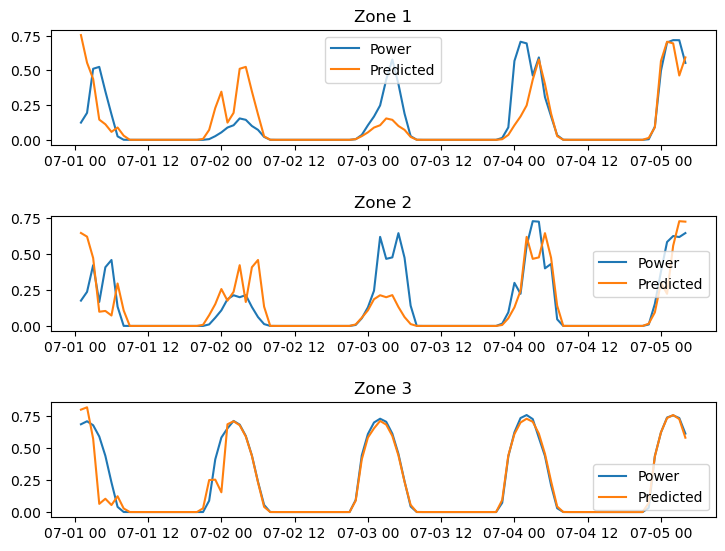

In [318]:
figure, axis = plt.subplots(3,1)

figure.tight_layout(pad=3)

for i in range(0, len(sv_predictions)):
    axis[i].plot(test_time[i]['TIMESTAMP'][:100], test_data[i]['POWER'][:100])
    axis[i].plot(test_time[i]['TIMESTAMP'][:100], sv_predictions[i][:100])
    axis[i].set_title(f"Zone {i+1}")
    axis[i].legend(['Power','Predicted'])

# Neural Network

In [345]:
from sklearn.neural_network import MLPRegressor
nn_predictions = []

drop_variables = ['VAR78', 'VAR79', 'VAR134', 'VAR164', 'mVAR169', 'mVAR178', 'mVAR228']
add_time_vars = ['MONTH', 'SEASON', 'HOUR']

# for i in range(1):
for i in range(0, len(train_data)):
    train_time_vars = train_time[0][add_time_vars].copy().reset_index()
    test_time_vars = test_time[i][add_time_vars].copy().reset_index()
    train_copy = train_data[i].copy().reset_index()
    train_copy = train_copy.drop(drop_variables, axis=1)
    train_copy = pd.concat([train_copy, train_time_vars], axis=1)
    test_copy = test_data[i].copy().reset_index()
    test_copy = test_copy.drop(drop_variables, axis=1)
    test_copy = pd.concat([test_copy, test_time_vars], axis=1)
    train_power = train_copy.pop("POWER")
    test_power = test_copy.pop("POWER")
    regressor = MLPRegressor(random_state=1, max_iter=3000, learning_rate='adaptive',
                hidden_layer_sizes=150).fit(train_copy,train_power)
    nn_prediction = regressor.predict(test_copy)
    nn_prediction[nn_prediction < 0] = 0
    # nn_prediction = MinMaxScaler().fit(nn_prediction).transform(nn_prediction)
    nn_predictions.append(nn_prediction)
    

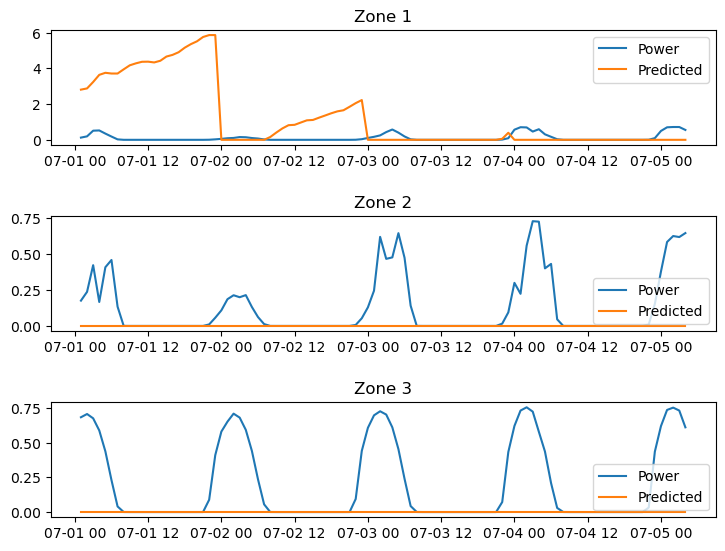

In [346]:
figure, axis = plt.subplots(3,1)
figure.tight_layout(pad=3)

for i in range(0, len(nn_predictions)):
    axis[i].plot(test_time[i]['TIMESTAMP'][:100], test_data[i]['POWER'][:100])
    axis[i].plot(test_time[i]['TIMESTAMP'][:100], nn_predictions[i][:100])
    axis[i].set_title(f"Zone {i+1}")
    axis[i].legend(['Power','Predicted'])

## Gradient Boosting Regressor

In [268]:
from sklearn.ensemble import HistGradientBoostingRegressor
boosted_predictions = []

drop_variables = ['VAR78', 'VAR79', 'VAR134', 'VAR164', 'mVAR169', 'mVAR178', 'mVAR228']
add_time_vars = ['MONTH', 'SEASON', 'HOUR']

for i in range (0, len(train_data)):
    train_time_vars = train_time[0][add_time_vars].copy().reset_index()
    test_time_vars = test_time[i][add_time_vars].copy().reset_index()
    train_copy = train_data[i].copy().reset_index()
    train_copy = train_copy.drop(drop_variables, axis=1)
    train_copy = pd.concat([train_copy, train_time_vars], axis=1)
    test_copy = test_data[i].copy().reset_index()
    test_copy = test_copy.drop(drop_variables, axis=1)
    test_copy = pd.concat([test_copy, test_time_vars], axis=1)
    train_power = train_copy.pop("POWER")
    test_power = test_copy.pop("POWER")

    est = HistGradientBoostingRegressor(max_iter=5000).fit(train_copy,train_power)
    prediction = est.predict(test_copy)
    prediction[prediction < 0] = 0
    boosted_predictions.append(prediction)

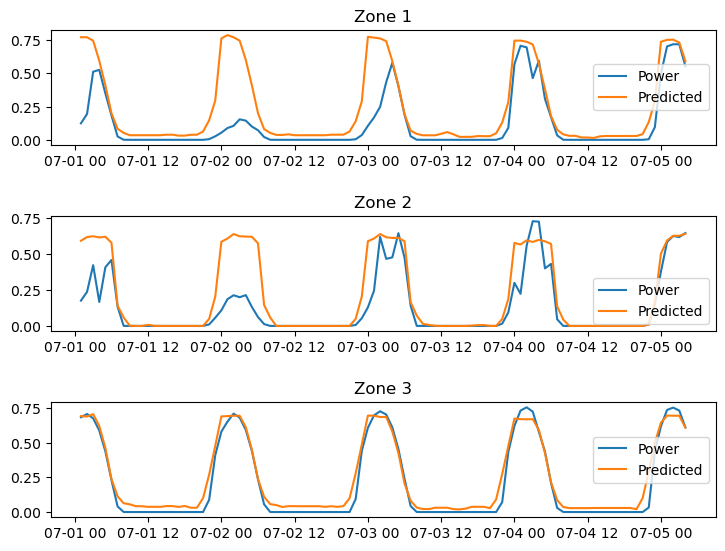

In [269]:
figure, axis = plt.subplots(3,1)
figure.tight_layout(pad=3)

for i in range(0, len(boosted_predictions)):
    axis[i].plot(test_time[i]['TIMESTAMP'][:100], test_data[i]['POWER'][:100])
    axis[i].plot(test_time[i]['TIMESTAMP'][:100], boosted_predictions[i][:100])
    axis[i].set_title(f"Zone {i+1}")
    axis[i].legend(['Power','Predicted'])

In [280]:
base_regressor_mix = []

for i in range(0,3):
    base_regressor_mix.append((sv_predictions[i] + boosted_predictions[i]/2))

## Definition of Performance Metrics
This project uses Mean Absolute error and Root Mean Squared Error to assess model performance.

In [270]:
# Definition of performance metrics
import numpy as np

def calc_performance_metrics(predictions, labels):
    if not isinstance(predictions, np.ndarray):
        predictions = predictions.copy().to_numpy()
    labels = labels.copy().to_numpy()
    return calc_mean_abs_err(predictions, labels), calc_rms_err(predictions, labels)
def calc_mean_abs_err(predictions, labels):
    num_points = len(predictions)
    difference = labels - predictions
    abs_diff = np.absolute(difference)
    return np.sum(abs_diff) / num_points
def calc_rms_err(predictions, labels):
    num_points = len(predictions)
    difference = labels - predictions
    sqr_diff = np.square(difference)
    return np.sqrt((1/num_points)*np.sum(sqr_diff))
    

# Model Evaluation

## Naive Solution

In [319]:
abs_errs = []
rmss = []
for i in range(0,3):
    abs_err, rms = calc_performance_metrics(sv_predictions[i], test_data[i]['POWER'])
    abs_errs.append(abs_err)
    rmss.append(rms)
abs_errs = np.array(abs_errs)
rmss = np.array(rmss)

baseline_metrics = pd.DataFrame([abs_errs, rmss], columns=['Zone 1', 'Zone 2', 'Zone 3'], index=['Abs Error', 'RMSE'])
baseline_metrics['Overall'] = baseline_metrics.mean(numeric_only=True, axis=1)
baseline_metrics

,Zone 1,Zone 2,Zone 3,Overall
Abs Error,0.057654,0.061354,0.062299,0.060436
RMSE,0.134947,0.143303,0.140298,0.139516


## Simple Neural Network
This model performed exceptionally poorly, likely requireing better cleaning of the data before training with it.

In [342]:
abs_errs = []
rmss = []
for i in range(0,3):
    abs_err, rms = calc_performance_metrics(nn_predictions[i], test_data[i]['POWER'])
    abs_errs.append(abs_err)
    rmss.append(rms)
abs_errs = np.array(abs_errs)
rmss = np.array(rmss)

nn_metrics = pd.DataFrame([abs_errs, rmss], columns=['Zone 1', 'Zone 2', 'Zone 3'], index=['Abs Error', 'RMSE'])
nn_metrics['Overall'] = nn_metrics.mean(numeric_only=True, axis=1)
nn_metrics

,Zone 1,Zone 2,Zone 3,Overall
Abs Error,189.586513,399.749384,656.132741,415.156213
RMSE,219.206605,407.170668,660.502607,428.959960


## Gradient Boosting Regressor
This model performed well across the three zones and overall.

In [273]:
abs_errs = []
rmss = []

for i in range(0,3):
    abs_err, rms = calc_performance_metrics(boosted_predictions[i], test_data[i]['POWER'])
    abs_errs.append(abs_err)
    rmss.append(rms)
abs_errs = np.array(abs_errs)
rmss = np.array(rmss)

regressor = pd.DataFrame([abs_errs, rmss], columns=['Zone 1', 'Zone 2', 'Zone 3'], index=['Abs Error', 'RMSE'])
regressor['Overall'] = regressor.mean(numeric_only=True, axis=1)
regressor

,Zone 1,Zone 2,Zone 3,Overall
Abs Error,0.075350,0.080318,0.087777,0.081148
RMSE,0.139135,0.147686,0.141311,0.142711


In [281]:
abs_errs = []
rmss = []

for i in range(0,3):
    abs_err, rms = calc_performance_metrics(base_regressor_mix[i], test_data[i]['POWER'])
    abs_errs.append(abs_err)
    rmss.append(rms)
abs_errs = np.array(abs_errs)
rmss = np.array(rmss)

mix = pd.DataFrame([abs_errs, rmss], columns=['Zone 1', 'Zone 2', 'Zone 3'], index=['Abs Error', 'RMSE'])
mix['Overall'] = mix.mean(numeric_only=True, axis=1)
mix

,Zone 1,Zone 2,Zone 3,Overall
Abs Error,0.105468,0.110985,0.123117,0.113190
RMSE,0.203791,0.213321,0.219479,0.212197


# Results in Seasons

In [313]:
dates = [0, 80, 160, 240]
index = [index*24 for index in dates]
seasons = ["Summer", "Fall", "Winter", "Spring"]

## Naive Model

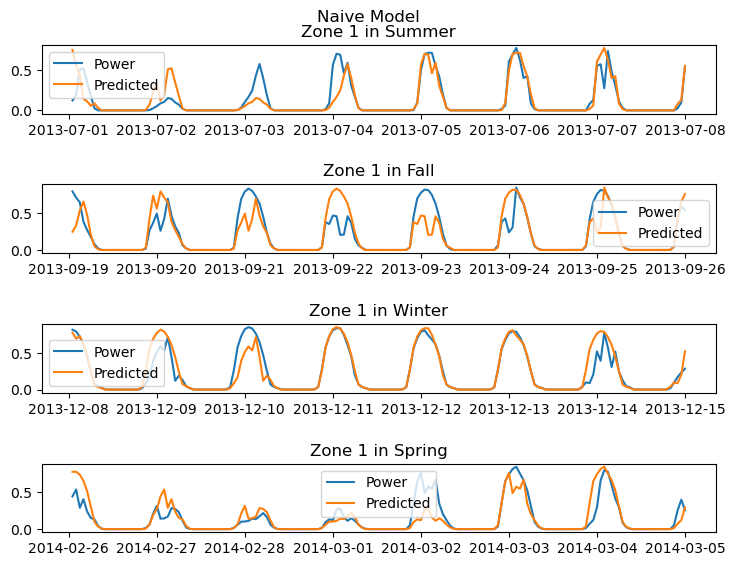

In [320]:
fig, axs = plt.subplots(4,1)
fig.tight_layout(pad=3)
fig.suptitle("Naive Model")
for i in range(0,4):
    axs[i].plot(test_time[0]['TIMESTAMP'][index[i]:index[i]+24*7], test_data[0]['POWER'][index[i]:index[i]+24*7])
    axs[i].plot(test_time[0]['TIMESTAMP'][index[i]:index[i]+24*7], sv_predictions[0][index[i]:index[i]+24*7])
    axs[i].legend(['Power','Predicted'])
    axs[i].set_title(f"Zone {1} in {seasons[i]}")

## Gradient Boosting Regressor

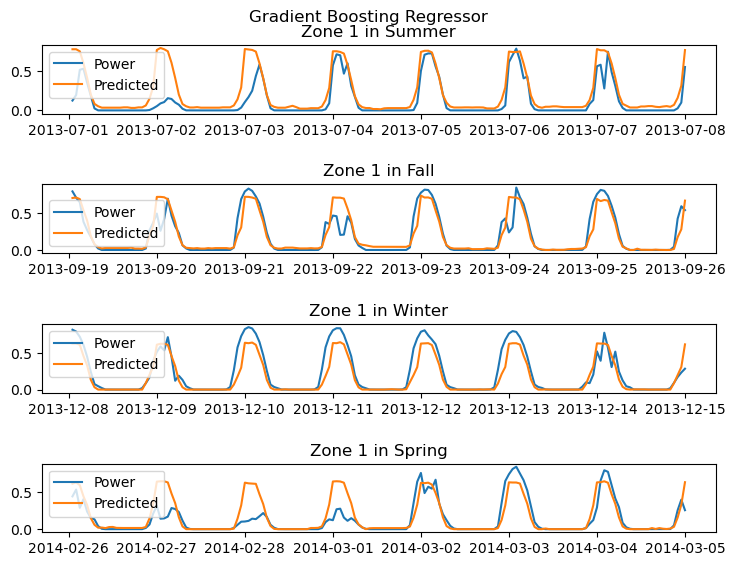

In [315]:
fig, axs = plt.subplots(4,1)
fig.tight_layout(pad=3)
fig.suptitle("Gradient Boosting Regressor")
for i in range(0,4):
    axs[i].plot(test_time[0]['TIMESTAMP'][index[i]:index[i]+24*7], test_data[0]['POWER'][index[i]:index[i]+24*7])
    axs[i].plot(test_time[0]['TIMESTAMP'][index[i]:index[i]+24*7], boosted_predictions[0][index[i]:index[i]+24*7])
    axs[i].legend(['Power','Predicted'])
    axs[i].legend(['Power','Predicted'])
    axs[i].set_title(f"Zone {1} in {seasons[i]}")

# References
Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond
https://doi.org/10.1016/j.ijforecast.2016.02.001

TensorFlow Time Series Forecasting: https://www.tensorflow.org/tutorials/structured_data/time_series

Time Series Forecasting using LSTM: https://www.youtube.com/watch?v=xaIA83x5Icg